In [2]:
#많이 사용하는 module 선언
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import folium
import os
os.getcwd()
os.chdir('C:\\Users\\jangs\\archive') 
library = pd.read_csv('Library.csv') #dataframe으로 저장

In [4]:
library.shape

(123, 18)

In [6]:
library.columns

Index(['고유번호', '구명', '법정동명', '산지여부', '주지번', '부지번', '새주소명', '시설명', '운영기관',
       '설립주체', '시설구분', '개관일', '면적', '홈페이지주소', '연락처', '생성일', '경도', '위도'],
      dtype='object')

In [7]:
library.head()

,고유번호,구명,법정동명,산지여부,주지번,부지번,새주소명,시설명,운영기관,설립주체,시설구분,개관일,면적,홈페이지주소,연락처,생성일,경도,위도
0,21,구로구,구로3동,1,777,1,구로구 디지털로 27다길 65 2층,꿈마을 도서관,구로구 시설관리공단,,구립도서관,2007-04-05,476.0,lib.guro.go.kr/dreamtown/,830-5807,,126.890115,37.487220
1,22,용산구,후암동,1,30,84,용산구 후암동 30-84,남산 도서관,,,교육청도서관,1922-10-05,0.0,lib.sen.go.kr/lib_index.jsp,,,126.981375,37.552664
2,23,중구,신당동,1,844,,중구 다산로 32,남산타운 문화체육센터 어린이도서관,시설관리공단,,구립도서관,2010-04-01,273.8,www.e-junggulib.or.kr,02-2280-8520,,127.009297,37.549020
3,24,노원구,상계10동,1,686,,노원구 온곡길 21,노원 정보도서관,노원 교육복지재단,,구립도서관,2006-02-15,6526.0,www.nowonlib.kr,02-950-0029,,127.064177,37.660927
4,25,노원구,중계3동,1,508,,노원구 중계3동 508,노원 평생학습관,,,교육청도서관,1990-05-08,0.0,lib.sen.go.kr/lib_index.jsp,,,127.067120,37.640120


In [9]:
#지도 열기 
m = folium.Map([37.5 , 127.0], zoom_start=11)
m

In [14]:
#loop를 활용하여 점찍기
m = folium.Map([37.5 , 127.0], zoom_start=11)
for i in range(len(library)):
    folium.Marker([library.위도[i],library.경도[i]], 
                  #기준으로 표기할 column data; (x,y 좌표값)
                  tooltip=library.시설명[i],
                  #마우스가 올라가면 표기될 명칭
                  popup='<a href="{0}" target="_blank">{0}</a>: {1}'.format(library.홈페이지주소[i],library.새주소명[i]),
                  #마우스 클릭하였을때 보일 값; url표기 하기 위해 html과 유사한 문법으로 표현; 
                  icon=folium.Icon(color='blue', icon='star')).add_to(m)
                  #marker 표식 모양, 색상 지정
m

# ================================================================================================================================
#print(library.위도[i],library.경도[i]).add_to(m)

#2번째 방법 (.iterrows); 선택한 열에 대해서 행 방향으로 자동 이동; '줄바꿈이 자동으로 '
#for index, row in library.iterrows():
#    print(row[' 위도'], rowp['경도']).add_to(m)
#    folium.Marker([row['위도'], row['경도']],
#     tooltip=row['시설명'],
#     popup='<a href="{}" target="_blank">{0}</a>: {1}'.format(row['홈페이지주소'],row['새주소명']),
#     icon=folium.Icon(color='blue', icon='star')).add_to(m)
    #m

In [21]:
# format 사용 방법


#solution 1
print('{0}: {1}-{3}-{2}'.format(1,'010',1111,2222))
#solution 2; 변수를 사용하는 방법 
#a = 10, b = 1111, c=2222
a, b, c = '010', 1111, 2222
print(f'{a}: {a}-{b}-{c}') #f'' : 형식으로 만들어줌


1: 010-2222-1111
010: 010-1111-2222


In [22]:
#marker cluster ; 먼거리에서 marker: 숫자형 데이터  > 가까워지면 개별로 보이는 것

# 기본지도 그리기
from folium.plugins import MarkerCluster

m = folium.Map([37.58, 127.0], zoom_start=10)

mc = MarkerCluster() 
for index, row in library.iterrows():
    mc.add_child(
        folium.Marker([row['위도'], row['경도']], 
                      tooltip=row['시설명'],
                      popup="{0}: <a href='{1}' target='_blank'>{1}</a>".format(row['새주소명'], row['홈페이지주소']),
                      icon=folium.Icon(color='blue', icon='star')))
m.add_child(mc)
m

In [34]:
# 지도 데이타포멧 (Geopandas)

#미국 실업률 
unemployment = pd.read_csv('US_Unemployment_Oct2012.csv')
unemployment.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [28]:
#json file 사용 

#미국 주경계 위도,경도 파일
import json
open('us-states.json')
text = open('us-states.json').read()
us_states = json.loads(text)
us_states['features'][0]['geometry']['coordinates'] #알라바마 경계 위도-경도

[[[-87.359296, 35.00118],
  [-85.606675, 34.984749],
  [-85.431413, 34.124869],
  [-85.184951, 32.859696],
  [-85.069935, 32.580372],
  [-84.960397, 32.421541],
  [-85.004212, 32.322956],
  [-84.889196, 32.262709],
  [-85.058981, 32.13674],
  [-85.053504, 32.01077],
  [-85.141136, 31.840985],
  [-85.042551, 31.539753],
  [-85.113751, 31.27686],
  [-85.004212, 31.003013],
  [-85.497137, 30.997536],
  [-87.600282, 30.997536],
  [-87.633143, 30.86609],
  [-87.408589, 30.674397],
  [-87.446927, 30.510088],
  [-87.37025, 30.427934],
  [-87.518128, 30.280057],
  [-87.655051, 30.247195],
  [-87.90699, 30.411504],
  [-87.934375, 30.657966],
  [-88.011052, 30.685351],
  [-88.10416, 30.499135],
  [-88.137022, 30.318396],
  [-88.394438, 30.367688],
  [-88.471115, 31.895754],
  [-88.241084, 33.796253],
  [-88.098683, 34.891641],
  [-88.202745, 34.995703],
  [-87.359296, 35.00118]]]

In [43]:
# 미국 실업율 지도 시각화
# 실업율 파일 열기
unemployment = pd.read_csv('US_Unemployment_Oct2012.csv')
unemployment.head()
# 미국 주경계 위도경도 파일열기
import json
text = open('us-states.json').read()
us_states = json.loads(text)
us_states['features'][0]['geometry']['coordinates'] #알라바마 경계 위도경도
us_states
# Choropleth Map
m = folium.Map([43, -102], zoom_start=3) #기본지도
folium.Choropleth(
    geo_data='us-states.json', #경계데이터
    data=unemployment, #그릴려는 데이터
    columns=['State', 'Unemployment'], #그릴려는 컬럼
    key_on='feature.id', #경계데이터에서 매칭되는 키
    fill_color='BuPu',
    fill_opacity=.5,
    line_opacity=.5,
    legend_name='unemployement rate (%)').add_to(m)
m

In [35]:
# 노령인구 파일 열기
older = pd.read_csv('older_population.csv')
older.head()

,구,동,인구,남자,여자
0,종로구,사직동,9700,4375,5325
1,종로구,삼청동,3013,1443,1570
2,종로구,부암동,10525,5002,5523
3,종로구,평창동,18830,8817,10013
4,종로구,무악동,8745,4078,4667


In [39]:
#한국 동경계 위도 경도 파일 열기 
import requests
page = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_submunicipalities_geo_simple.json')
seoul_json = json.loads(page.content)
seoul_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '1125074',
    'name': '길동',
    'name_eng': 'Gil-dong',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.1506841825971, 37.54297943719738],
      [127.15666236342832, 37.539490196374366],
      [127.16251899968245, 37.538797310633534],
      [127.14516817132433, 37.53146260022831],
      [127.14068690059868, 37.53118632106941],
      [127.13640539515914, 37.53247023366308],
      [127.13892320331327, 37.53762754601835],
      [127.14380192958487, 37.53947695668667],
      [127.14484779315524, 37.542271071578554],
      [127.1506841825971, 37.54297943719738]]]}},
  {'type': 'Feature',
   'properties': {'code': '1125073',
    'name': '천호2동',
    'name_eng': 'Cheonho 2(i)-dong',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.1296594431204, 37.547320969604925],
      [127.1366922994031, 37.54432073003471],
      [127.133259

In [48]:
# 한국 동-경계 위도경도 파일 열기
import requests
page = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_submunicipalities_geo_simple.json')
seoul_json = json.loads(page.content)
seoul_json
seoul_json['features'][0]['properties']['name']
m = folium.Map([37.541, 126.986], zoom_start=10)
folium.Choropleth(
    geo_data=seoul_json,
    data=older,    
    columns=['동', '인구'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=.5,
    line_opacity=.5,
    legend_name='노령화 인구').add_to(m)
m

In [51]:
#poly-line ; 특정 pointer를 지나가는 경로 표기할때; 

lines = [[37.5014009, 127.1586471],
[37.6449368, 127.0737283],
[37.6403353, 127.0776372],
[37.6457235, 127.0204494],
[37.6597831, 127.0311865]]
m = folium.Map ([37.541, 126.986], zoom_start = 10)
folium.PolyLine(lines,
               color='black',
               tooltip='집가는 길').add_to(m)
m

# 머신러닝 알고리즘

In [52]:
# 전처리 
#인코딩 연습
df = pd.DataFrame({
    'name':['john','mary','paul'],
    'age':[30,25,40],
    'city':['new york','los angeles','london']
})

df

,name,age,city
0,john,30,new york
1,mary,25,los angeles
2,paul,40,london


In [53]:
#단일 데이터 대체
df.replace(25,40)

,name,age,city
0,john,30,new york
1,mary,40,los angeles
2,paul,40,london


In [54]:
#여러 데이터를 대체할때
df.replace({
    25:26,
    'mary':'you'
})

,name,age,city
0,john,30,new york
1,you,26,los angeles
2,paul,40,london


In [ ]:
# 정규식 찾아보기 

In [61]:
# 정규식으로 대체
df.replace('jo.+', 'FOO', regex=True)
df

,name,num_children,num_pets
0,john,0,0
1,mary,4,1
2,paul,5,2


In [69]:
df = pd.DataFrame({
    'name':['john','mary','paul'],
    'age':[30,25,40],
    'city':['new york','los angeles','london']
})

df.replace('jo.+','FOO',regex=True)

,name,age,city
0,FOO,30,new york
1,mary,25,los angeles
2,paul,40,london


In [67]:
#정규식으로 대체
df.replace({'name':'[jo.+]'},"boss",regex=True)
df

,name,num_children,num_pets
0,john,0,0
1,mary,4,1
2,paul,5,2


In [59]:
df.replace({'num_pets': {0:1}})

,name,num_children,num_pets
0,john,0,1
1,mary,4,1
2,paul,5,2


In [85]:
import random

lst_box = ['electrical']*6+['mechanical']*4
random.shuffle(lst_box) #shuffle 함수를 새로운 변수에 저장하는것이 아님!

df = pd.DataFrame({
    'service_call': np.arange(1,11),
    'Months_since_last_call': [random.randint(2,8) for _ in range(10)],
    'repair_type': lst_box,
    'repair_time': [random.randint(18,49)/10 for _ in range(10)]
})
df

,service_call,Months_since_last_call,repair_type,repair_time
0,1,4,mechanical,2.2
1,2,5,mechanical,4.5
2,3,7,mechanical,4.0
3,4,7,electrical,2.7
4,5,5,electrical,4.1
5,6,4,electrical,3.6
6,7,3,electrical,4.0
7,8,6,electrical,4.9
8,9,4,mechanical,4.2
9,10,5,electrical,2.2


In [88]:
df

,service_call,Months_since_last_call,repair_type,repair_time
0,1,4,0,2.2
1,2,5,0,4.5
2,3,7,0,4.0
3,4,7,1,2.7
4,5,5,1,4.1
5,6,4,1,3.6
6,7,3,1,4.0
7,8,6,1,4.9
8,9,4,0,4.2
9,10,5,1,2.2


In [86]:
#replace를 이용하여 encoding
df.replace(['electrical', 'mechanical'], [1, 0], inplace=True)

In [87]:
df

,service_call,Months_since_last_call,repair_type,repair_time
0,1,4,0,2.2
1,2,5,0,4.5
2,3,7,0,4.0
3,4,7,1,2.7
4,5,5,1,4.1
5,6,4,1,3.6
6,7,3,1,4.0
7,8,6,1,4.9
8,9,4,0,4.2
9,10,5,1,2.2


In [101]:
lst_box = ['electrical']*6+['mechanical']*4
random.shuffle(lst_box) #shuffle 함수를 새로운 변수에 저장하는것이 아님!

df = pd.DataFrame({
    'service_call': np.arange(1,11),
    'Months_since_last_call': [random.randint(2,8) for _ in range(10)],
    'repair_type': lst_box,
    'repair_time': [random.randint(18,49)/10 for _ in range(10)]
})
df

,service_call,Months_since_last_call,repair_type,repair_time
0,1,7,electrical,2.2
1,2,4,electrical,4.7
2,3,7,mechanical,3.2
3,4,8,mechanical,2.9
4,5,8,electrical,2.4
5,6,3,electrical,4.4
6,7,3,electrical,3.5
7,8,3,mechanical,3.7
8,9,5,mechanical,4.3
9,10,8,electrical,2.6


In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.repair_type = le.fit_transform(df.repair_type)
df

,service_call,Months_since_last_call,repair_type,repair_time
0,1,7,0,2.2
1,2,4,0,4.7
2,3,7,1,3.2
3,4,8,1,2.9
4,5,8,0,2.4
5,6,3,0,4.4
6,7,3,0,3.5
7,8,3,1,3.7
8,9,5,1,4.3
9,10,8,0,2.6


In [103]:
le.classes_ #replace된 값을 확인 

array(['electrical', 'mechanical'], dtype=object)

In [104]:
le.inverse_transform(df.repair_type)#인코딩 한 값을 변환전으로 초기화 


array(['electrical', 'electrical', 'mechanical', 'mechanical',
       'electrical', 'electrical', 'electrical', 'mechanical',
       'mechanical', 'electrical'], dtype=object)

In [105]:
#one hot Encoder를 이용해서 인코딩하는 경우 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder
dummy = ohe.fit_

,service_call,Months_since_last_call,repair_type,repair_time
0,1,7,0,2.2
1,2,4,0,4.7
2,3,7,1,3.2
3,4,8,1,2.9
4,5,8,0,2.4
5,6,3,0,4.4
6,7,3,0,3.5
7,8,3,1,3.7
8,9,5,1,4.3
9,10,8,0,2.6


In [106]:
# 1D 시리즈를 2D array로 바꾸는 방법; reshape
# df.repair_type.values.reshape(1,-1)


,service_call,month_since_last_call,repair_type,repair_time
0,1,7,electrical,2.5
1,2,7,electrical,2.8
2,3,2,mechanical,2.5
3,4,5,electrical,4.8
4,5,5,electrical,2.3
5,6,3,electrical,3.8
6,7,9,electrical,2.1
7,8,9,mechanical,2.3
8,9,2,mechanical,3.5
9,10,8,mechanical,2.7


In [107]:
# ONE HOT ENCODER를 이용해서 인코딩 하는 경우
a = ['electrical']*6+['mechanical']*4
random.shuffle(a)
df = pd.DataFrame({
    'service_call':np.arange(1,11),
    'month_since_last_call':[random.randint(2,9) for _ in range(10)],
    'repair_type': a,
    'repair_time': [random.randint(18, 49)/10 for _ in range(10)]    
})
df

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
dummy = ohe.fit_transform(df.repair_type.values.reshape(-1,1)).toarray()
dummy


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [112]:
#col 이름 
dummy = pd.DataFrame(dummy, columns = ohe.get_feature_names_out())
dummy

,x0_electrical,x0_mechanical
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


In [109]:
#tqble 합치기 
df = pd.concat([df, dummy], axis=1) 
df

,service_call,month_since_last_call,repair_type,repair_time,x0_electrical,x0_mechanical
0,1,7,electrical,2.5,1.0,0.0
1,2,7,electrical,2.8,1.0,0.0
2,3,2,mechanical,2.5,0.0,1.0
3,4,5,electrical,4.8,1.0,0.0
4,5,5,electrical,2.3,1.0,0.0
5,6,3,electrical,3.8,1.0,0.0
6,7,9,electrical,2.1,1.0,0.0
7,8,9,mechanical,2.3,0.0,1.0
8,9,2,mechanical,3.5,0.0,1.0
9,10,8,mechanical,2.7,0.0,1.0


In [111]:
#중복되는 범위데이터 삭제
df = df.drop('repair_type', axis=1)
df

,service_call,month_since_last_call,repair_time,x0_electrical,x0_mechanical
0,1,7,2.5,1.0,0.0
1,2,7,2.8,1.0,0.0
2,3,2,2.5,0.0,1.0
3,4,5,4.8,1.0,0.0
4,5,5,2.3,1.0,0.0
5,6,3,3.8,1.0,0.0
6,7,9,2.1,1.0,0.0
7,8,9,2.3,0.0,1.0
8,9,2,3.5,0.0,1.0
9,10,8,2.7,0.0,1.0


In [113]:
df = pd.DataFrame({
    'service_call':np.arange(1,11),
    'month_since_last_call':[random.randint(2,9) for _ in range(10)],
    'repair_type': a,
    'repair_time': [random.randint(18, 49)/10 for _ in range(10)]    
})
df_src = df.copy() #df 작업용으로 사용하기 위해 원본 df_src 만듬 

In [114]:
#get_dummies을 이용하여 인코딩하는 경우 
df = df_src.copy()
dummy = pd.get_dummies(df.repair_type) # 인코딩할 행 선택
df=pd.concat([df,dummy], axis=1)       # 열방향으로 추가  
df.drop('repair_type', axis=1, inplace=True) #인코딩한 '범주 데이터' 삭제 
df

,service_call,month_since_last_call,repair_time,electrical,mechanical
0,1,4,4.2,1,0
1,2,5,3.7,1,0
2,3,8,3.0,0,1
3,4,8,4.2,1,0
4,5,6,2.3,1,0
5,6,7,3.0,1,0
6,7,9,2.9,1,0
7,8,7,4.1,0,1
8,9,9,4.9,0,1
9,10,5,4.4,0,1


In [116]:
country = ['France']*4 +['Germany']*3+['Spain']*3
random.shuffle(country)
country


purchased = ['No']*5 + ['Yes']*5
random.shuffle(purchased)


In [117]:
age = [random.randint(27, 50) for _ in range(10)]
age[6] = np.nan

salary = [random.randint(48, 83)*1000 for _ in range(10)]
salary[4] =np.nan



In [129]:
df = pd.DataFrame({
    'country':country,
    'age':age,
    'salary':salary,
    'purchased':purchased
})
df_src = df.copy()
df_src

,country,age,salary,purchased
0,France,33.0,69000.0,No
1,Spain,36.0,52000.0,Yes
2,France,33.0,65000.0,No
3,Germany,50.0,49000.0,Yes
4,Germany,48.0,NaN,Yes
5,Spain,40.0,55000.0,Yes
6,Spain,NaN,61000.0,No
7,France,49.0,58000.0,Yes
8,France,40.0,62000.0,No
9,Germany,32.0,68000.0,No


In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,0] = le.fit_transform(df.iloc[:, 0])
df

C:\Users\jangs\AppData\Local\Temp\ipykernel_33480\3953750414.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0] = le.fit_transform(df.iloc[:, 0])


,country,age,salary,purchased,country_France,country_Germany,country_Spain,purchased_No,purchased_Yes
0,0,33.0,69000.0,No,1.0,0.0,0.0,1.0,0.0
1,2,36.0,52000.0,Yes,0.0,0.0,1.0,0.0,1.0
2,0,33.0,65000.0,No,1.0,0.0,0.0,1.0,0.0
3,1,50.0,49000.0,Yes,0.0,1.0,0.0,0.0,1.0
4,1,48.0,NaN,Yes,0.0,1.0,0.0,0.0,1.0
5,2,40.0,55000.0,Yes,0.0,0.0,1.0,0.0,1.0
6,2,NaN,61000.0,No,0.0,0.0,1.0,1.0,0.0
7,0,49.0,58000.0,Yes,1.0,0.0,0.0,0.0,1.0
8,0,40.0,62000.0,No,1.0,0.0,0.0,1.0,0.0
9,1,32.0,68000.0,No,0.0,1.0,0.0,1.0,0.0


In [124]:
le.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

In [ ]:
le.inverse_transform

In [132]:
#one hot encoder
from sklearn.preprocessing import OneHotEncoder
df = df_src.copy() #encoding 되지 않은 데이타 프레임
ohe = OneHotEncoder()
dummy = ohe.fit_transform(df[['country', 'purchased']]).toarray()
#2차원 데이타 일때는 형변환 필요 없음
dummy = pd.DataFrame(dummy, columns=ohe.get_feature_names_out())
df = pd.concat([df, dummy], axis=1)
df


,country,age,salary,purchased,country_France,country_Germany,country_Spain,purchased_No,purchased_Yes
0,France,33.0,69000.0,No,1.0,0.0,0.0,1.0,0.0
1,Spain,36.0,52000.0,Yes,0.0,0.0,1.0,0.0,1.0
2,France,33.0,65000.0,No,1.0,0.0,0.0,1.0,0.0
3,Germany,50.0,49000.0,Yes,0.0,1.0,0.0,0.0,1.0
4,Germany,48.0,NaN,Yes,0.0,1.0,0.0,0.0,1.0
5,Spain,40.0,55000.0,Yes,0.0,0.0,1.0,0.0,1.0
6,Spain,NaN,61000.0,No,0.0,0.0,1.0,1.0,0.0
7,France,49.0,58000.0,Yes,1.0,0.0,0.0,0.0,1.0
8,France,40.0,62000.0,No,1.0,0.0,0.0,1.0,0.0
9,Germany,32.0,68000.0,No,0.0,1.0,0.0,1.0,0.0


In [131]:
# one hot encoder
from sklearn.preprocessing import OneHotEncoder
df = df_src.copy() #인코딩 안된 데이터프레임
ohe = OneHotEncoder()
dummy = ohe.fit_transform(df[['Country', 'Purchased']]).toarray() 
#2D일 때는 데이터 변형할 필요가 없음
dummy = pd.DataFrame(dummy, columns=ohe.get_feature_names_out())
df = pd.concat([df, dummy], axis=1) #더미를 데이터프레임에 넣어서 병합
df

KeyError: "None of [Index(['Country', 'Purchased'], dtype='object')] are in the [columns]"

In [134]:
#꽃 종류 예측 모델 
from sklearn import datasets
iris = datasets.load_iris()

In [135]:
print(iris.DESCR) #dataset에 대한 정보 출력

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [136]:
#데이터만 추출; (x-값만 추출 )
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [137]:
iris.target #꽃의 종류 : y 값 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [138]:
iris.target_names #class 종류

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [140]:
iris.feature_names # 변수명

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [146]:
# 변수명 변경
col_lst = ['_'.join(col[:-5].split(' ')) for col in iris.feature_names]
col_lst

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [148]:
#파일에서 가져오는 과정 
#데이터 생성; 
iris_df = pd.DataFrame(iris.data, columns=col_lst)
iris_df['species'] = iris.target
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [151]:
#data inspection  #데이터 형식 확인
iris_df.head()
iris_df.tail()
iris_df.info() #데이터의 전반적인 정보를 확인할때 
#species (범주형)데이터 ==> 분류 알고리즘으로 모델링

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [152]:
iris_df.isna().sum() #결측치 체크 #null값이 있으면 model생성이 되지 않음

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [153]:
#species를 문자열로 변환 ; why: 데이터를 시각화할때 더 쉽게 이해할수 있기 때문
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [154]:
iris_df.species.replace([0,1,2], iris.target_names, inplace=True)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [155]:
#사전분석 (EDA) : 단별량, 개별량? 데이터들간의 연관관계 확인

#univariate analysis (기술통계, 히스토그램, 카운트 플랏)
#기술통계
iris_df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


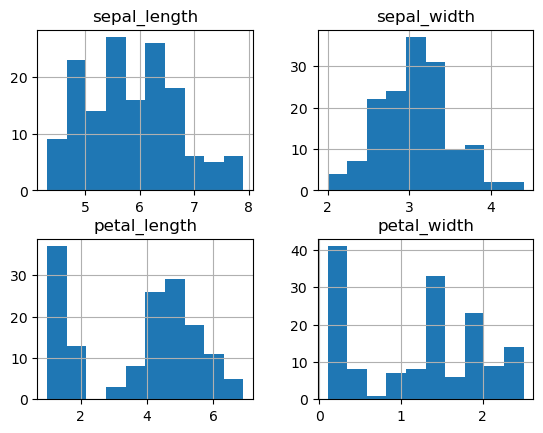

In [156]:
#히스토그램
iris_df.hist()
plt.show()

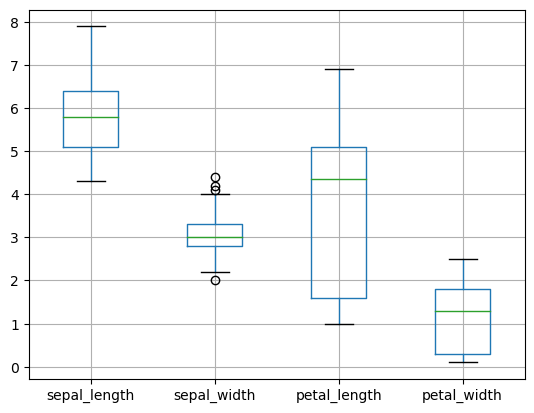

In [157]:
iris_df.boxplot()
plt.show()

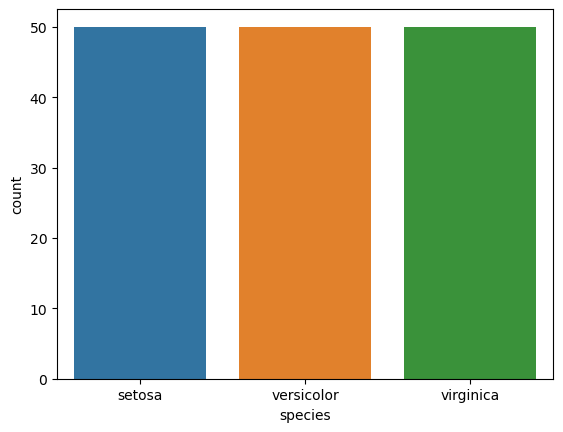

In [159]:
#카운트 플랏 
sns.countplot(x=iris_df.species)
plt.show()

In [160]:
#꽃의 종 빈도테이블 ; 데이터의 편향성 확인? 
iris_df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

C:\Users\jangs\AppData\Local\Temp\ipykernel_33480\2276349499.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(), annot=True)


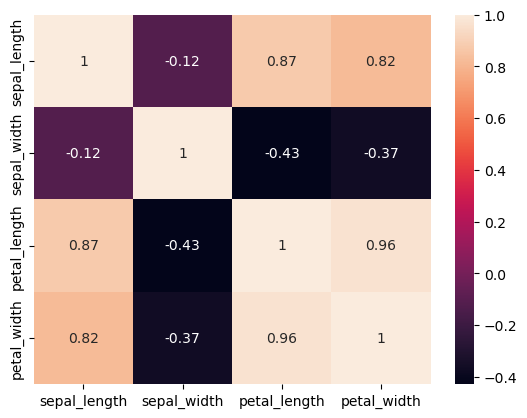

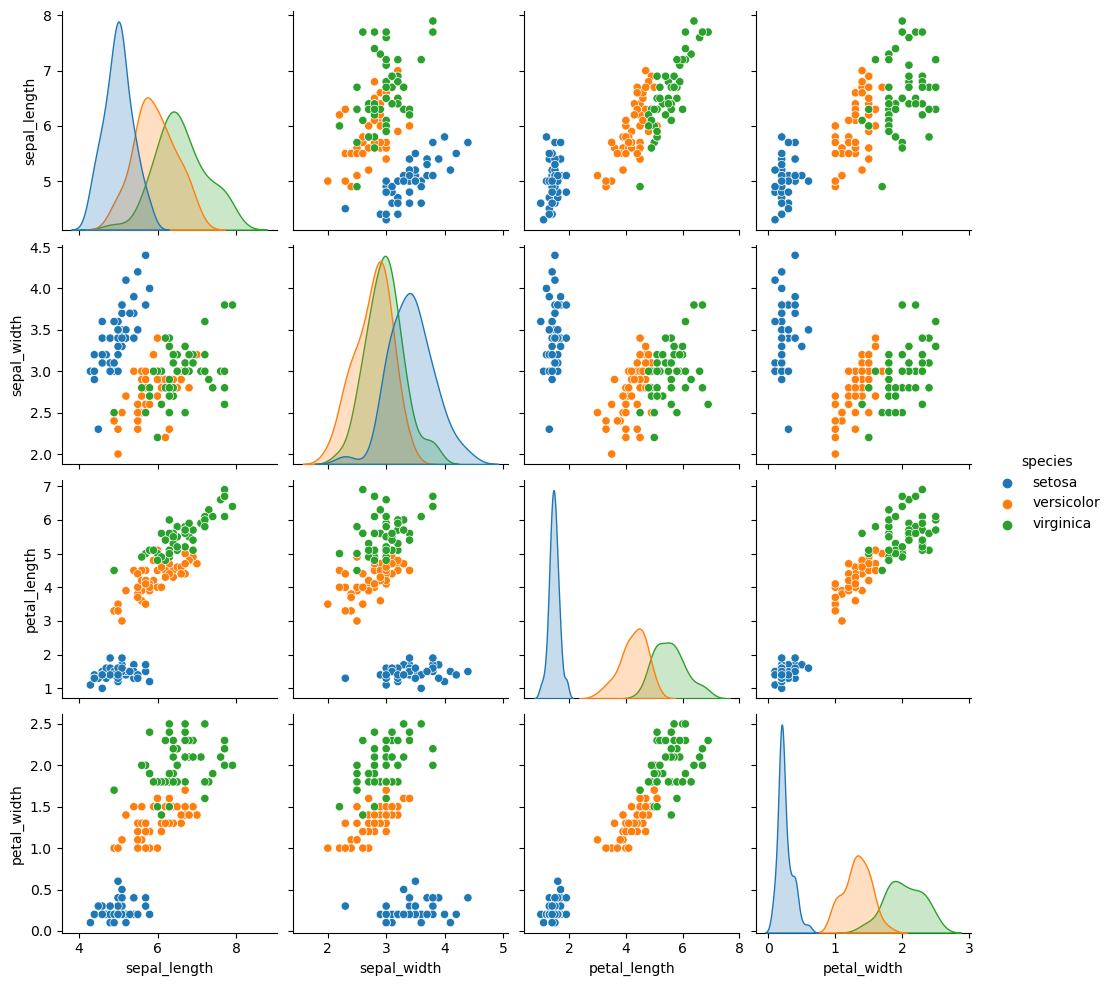

In [162]:
# multivariate analysis 
# 상관관계 ; 데이터의 종류/특성 확인 (변수들의 속성 분류할수있는 특징 확인)
sns.heatmap(iris_df.corr(), annot=True)
plt.show()
sns.pairplot(iris_df, hue='species')
plt.show()

In [167]:
# x and y split
y = iris_df.species #예측에 사용할 데이터 
x = iris_df.drop('species',axis=1)

In [168]:
#y값 인코딩 #예측하고 싶은 데이터
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [171]:
#train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y
                                                    , test_size=.2 #테스트데이터 사이즈 지정
                                                    , random_state=1) #훈련, 검증 데이터를 고정 
#len(x_train),len(x_test),len(y_train),len(y_test)
x_train, x_test

(     sepal_length  sepal_width  petal_length  petal_width
 91            6.1          3.0           4.6          1.4
 135           7.7          3.0           6.1          2.3
 69            5.6          2.5           3.9          1.1
 128           6.4          2.8           5.6          2.1
 114           5.8          2.8           5.1          2.4
 ..            ...          ...           ...          ...
 133           6.3          2.8           5.1          1.5
 137           6.4          3.1           5.5          1.8
 72            6.3          2.5           4.9          1.5
 140           6.7          3.1           5.6          2.4
 37            4.9          3.6           1.4          0.1
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 14            5.8          4.0           1.2          0.2
 98            5.1          2.5           3.0          1.1
 75            6.6          3.0           4.4          1.4
 16            5.4          3

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y
                                                    , test_size=.2 #테스트데이터 사이즈 지정
                                                    )
#len(x_train),len(x_test),len(y_train),len(y_test)
x_train, x_test

(     sepal_length  sepal_width  petal_length  petal_width
 53            5.5          2.3           4.0          1.3
 83            6.0          2.7           5.1          1.6
 38            4.4          3.0           1.3          0.2
 25            5.0          3.0           1.6          0.2
 116           6.5          3.0           5.5          1.8
 ..            ...          ...           ...          ...
 106           4.9          2.5           4.5          1.7
 81            5.5          2.4           3.7          1.0
 19            5.1          3.8           1.5          0.3
 138           6.0          3.0           4.8          1.8
 5             5.4          3.9           1.7          0.4
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 59            5.2          2.7           3.9          1.4
 1             4.9          3.0           1.4          0.2
 136           6.3          3.4           5.6          2.4
 148           6.2          3

In [179]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)


#max_iter ; ?? 계산 값을 조정 >> 현재 계산값이 수렴되지 않아 오류, 계산값을 조정하여 수정 

C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#로지스틱 모델

In [180]:
log_model.intercept_ #모델의 y절편

array([  9.64534289,   1.82536999, -11.47071288])

In [182]:
log_model.coef_ #모델의 기울기

array([[-0.43699072,  0.90332383, -2.418392  , -0.94914456],
       [ 0.52193697, -0.24511569, -0.15816928, -0.93408936],
       [-0.08494625, -0.65820814,  2.57656128,  1.88323393]])

In [ ]:
#모델 평가 

In [183]:
log_model.score(x_test, y_test) # 검증 데이터의 정확도

0.9666666666666667

In [184]:
log_model.score(x_train, y_train) #훈련 데이터의 정확도

0.975

In [185]:
#skilearn 평가방법
from sklearn.metrics import accuracy_score
y_pred = log_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [189]:
#교차검증 ; test값을 변경하며 model의 정확도를 simulate하는 방법 
from sklearn.model_selection import cross_val_score
log_cv = cross_val_score(log_model, x_test, y_test, cv=10, scoring='accuracy')
log_cv
log_cv.mean(), log_cv.std()

C:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


(0.9, 0.1527525231651947)

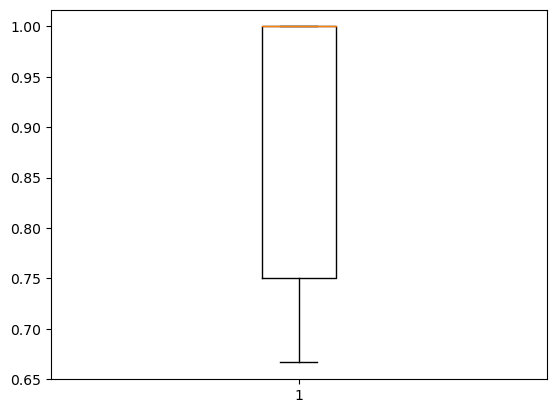

In [190]:
plt.boxplot(log_cv)
plt.show()